In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 12)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
China_df = country_df[country_df.Country == 'US'].set_index('Date')
world_without_China = pd.DataFrame({col:W[col] - China_df[col] for col in ['Confirmed', 'Recovered', 'Deaths']})
world_without_China['Country'] = ['World without US' for _ in range(len(world_without_China))]
world_without_China['Date'] = world_without_China.index
country_df = country_df.append(world_without_China)

In [7]:
country_df['Date'] = pd.to_datetime(country_df.Date)

'''country_df['Removed'] = country_df.Deaths / 0.028
country_df.Confirmed = country_df.Removed.shift(periods = -14)
country_df['Active'] = country_df.Confirmed - country_df.Removed
country_df['Mortality'] = country_df.Deaths/country_df.Removed
country_df['Part_Active'] = country_df.Active/country_df.Confirmed'''

"country_df['Removed'] = country_df.Deaths / 0.028\ncountry_df.Confirmed = country_df.Removed.shift(periods = -14)\ncountry_df['Active'] = country_df.Confirmed - country_df.Removed\ncountry_df['Mortality'] = country_df.Deaths/country_df.Removed\ncountry_df['Part_Active'] = country_df.Active/country_df.Confirmed"

In [8]:
last_day = dt.date.today() - dt.timedelta(days=1)
Last_day_df = country_df[country_df.Date == last_day].set_index('Country')
Last_day_df = Last_day_df[Last_day_df.Confirmed>5000]

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


In [9]:
C = ['Confirmed', 'Active', 'Removed', 'Recovered', 'Deaths', 'Mortality', 'Part_Active']

In [10]:
Important_countries = ['India', 'World', 'World without US',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'United Kingdom', 'France',
                      'Korea, South', 'Iran'][::-1]
DF_Dict = {country: country_df[country_df.Country == country].set_index('Date').drop(columns = ['Country'])
                        for country in Last_day_df.index}

In [11]:
Last_day_df[Last_day_df.index.isin(Important_countries)]

,Confirmed,Date,Deaths,Recovered
Country,,,,
China,83760,2020-04-17,4636,77552
France,149130,2020-04-17,18703,35006
Germany,141397,2020-04-17,4352,83114
India,14352,2020-04-17,486,2041
Iran,79494,2020-04-17,4958,54064
Italy,172434,2020-04-17,22745,42727
"Korea, South",10635,2020-04-17,230,7829
Spain,190839,2020-04-17,20002,74797
US,699706,2020-04-17,36773,58545


In [12]:
Daily_new =  ['Confirmed', 'Removed', 'Recovered', 'Deaths']
d = 14
for cun in Last_day_df.index:
    df = DF_Dict[cun]
    
    DF_Dict[cun]['Removed']     = DF_Dict[cun].Deaths /0.028
    DF_Dict[cun]['Confirmed']   = DF_Dict[cun].Removed.shift(periods = -14)
    DF_Dict[cun]['Active']      = DF_Dict[cun].Confirmed - DF_Dict[cun].Removed
    DF_Dict[cun]['Mortality']   = DF_Dict[cun].Deaths/DF_Dict[cun].Removed
    DF_Dict[cun]['Part_Active'] = DF_Dict[cun].Active/DF_Dict[cun].Confirmed

    for col in Daily_new:
        L = list(df[col])
        K = L[:d] + [L[i+d] - L[i] for i in range(len(df) - d)]
        DF_Dict[cun]['Week_'+col] = K
    DF_Dict[cun]['Week_Mortality'] = DF_Dict[cun]['Week_Deaths']/DF_Dict[cun]['Week_Removed']

In [22]:
Doubling_period = {}
for cun in DF_Dict:
    tr = int(Last_day_df[Last_day_df.index == cun].Deaths)
    rp = len(DF_Dict[cun][DF_Dict[cun].Deaths >= tr/2])
    Doubling_period[cun] = [rp]
pd.DataFrame(Doubling_period)[Important_countries].transpose()

,0
Iran,21
"Korea, South",25
France,11
United Kingdom,9
China,56
Spain,16
Italy,19
Germany,10
US,8
World without US,13


In [21]:
DC = DF_Dict['India'].columns
DF_Dict['India']

,Confirmed,Deaths,Recovered,Removed,Active,Mortality,Part_Active,Week_Confirmed,Week_Removed,Week_Recovered,Week_Deaths,Week_Mortality
Date,,,,,,,,,,,,
2020-01-22,0.000000,0,0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0,0,NaN
2020-01-23,0.000000,0,0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0,0,NaN
2020-01-24,0.000000,0,0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0,0,NaN
2020-01-25,0.000000,0,0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0,0,NaN
2020-01-26,0.000000,0,0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0,0,NaN
2020-01-27,0.000000,0,0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0,0,NaN
2020-01-28,0.000000,0,0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0,0,NaN
2020-01-29,0.000000,0,0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0,0,NaN
2020-01-30,0.000000,0,0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0,0,NaN


In [15]:
Last_day_df[Last_day_df.index.isin(Important_countries)]

,Confirmed,Date,Deaths,Recovered
Country,,,,
China,83760,2020-04-17,4636,77552
France,149130,2020-04-17,18703,35006
Germany,141397,2020-04-17,4352,83114
India,14352,2020-04-17,486,2041
Iran,79494,2020-04-17,4958,54064
Italy,172434,2020-04-17,22745,42727
"Korea, South",10635,2020-04-17,230,7829
Spain,190839,2020-04-17,20002,74797
US,699706,2020-04-17,36773,58545


In [16]:
colors = {'India': 'Blue', 'World': 'Blue', 'World without US': 'Green', 'US': 'Black', 'China': 'red', 'Spain': 'yellow',
         'Italy': 'pink', 'Iran': 'red', 'Ireland': 'violet', 'United Kingdom': 'Purple', 'Korea, South': 'Black',
         'France': 'orange', 'Germany': 'Green'}

def plotwithx(x, cols, DF_Dict = DF_Dict):
    for col in cols:
        if col!=x:
            plt.figure(figsize = (14, 8))
            plt.title(f'{col} with respect to {x}')
            plt.xlabel(x)
            plt.ylabel(col)
            if x in DC:
                plt.xscale('log')
                #plt.xlim(5*10**3, 5*10**6)

            if col not in ['Mortality', 'Part_Active', 'Week_Mortality']:
                plt.yscale('log')
                #plt.ylim(10**1, 10**7)
            for cun in Important_countries:
                df = DF_Dict[cun]#.tail(50)
                if x == 'Date':
                    X = df.index
                else:
                    X = df[x]
                plt.plot(X, 
                         df[col],
                         label = cun,
                         linewidth = 3.5,
                         linestyle = '-.' if 'World' in cun else '-',
                         color = colors[cun], 
                         alpha = 0.6
                        )
            plt.legend(Important_countries)
            plt.plot()


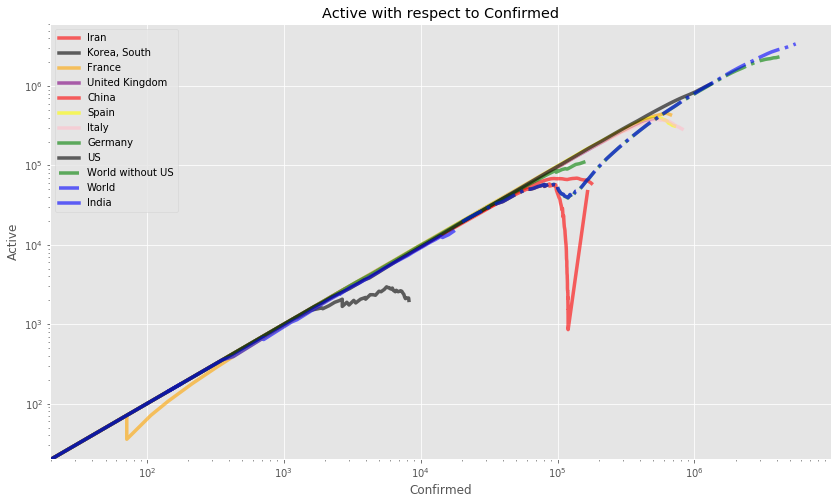

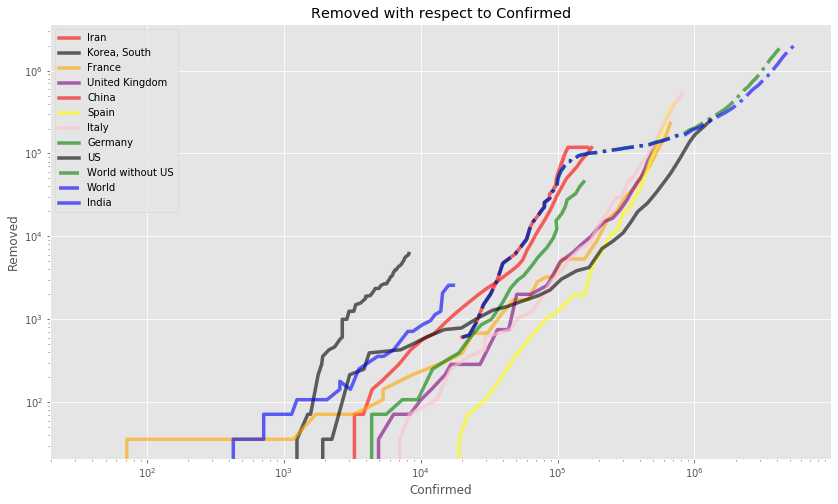

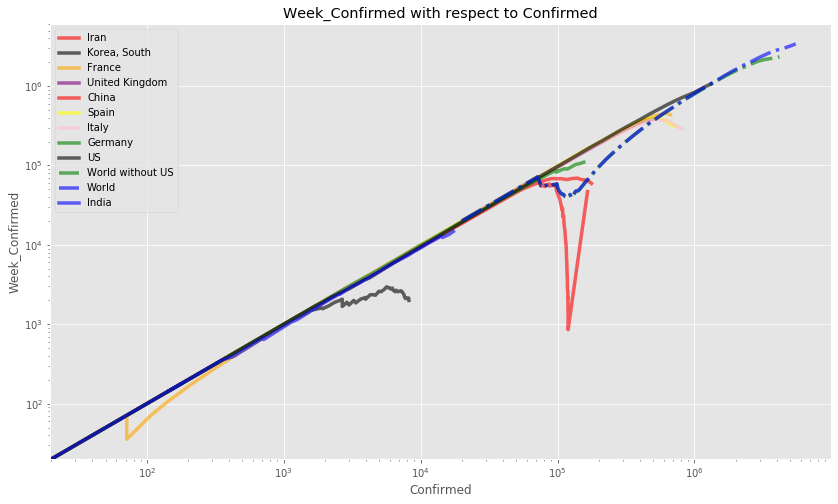

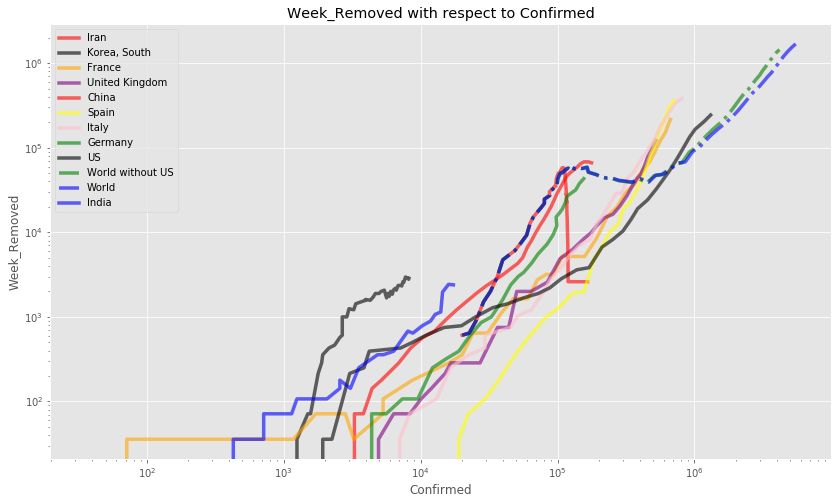

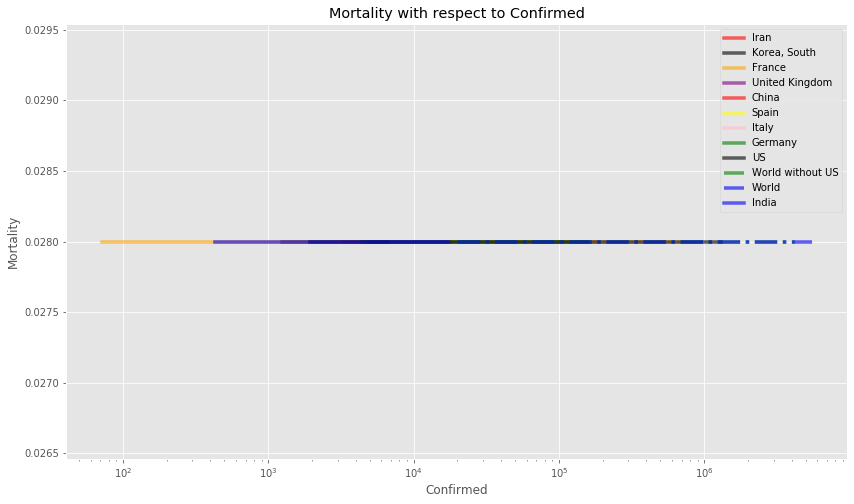

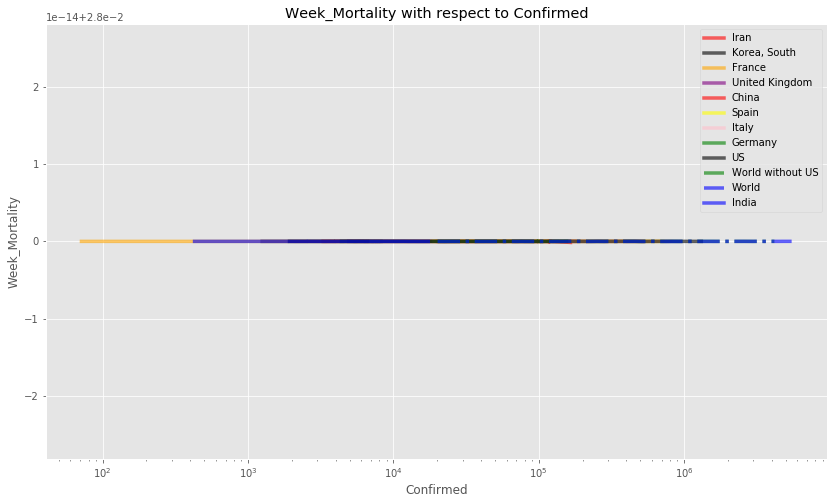

In [17]:
plotwithx('Confirmed', ['Active', 'Removed', 'Week_Confirmed', 'Week_Removed', 'Mortality', 'Week_Mortality'])

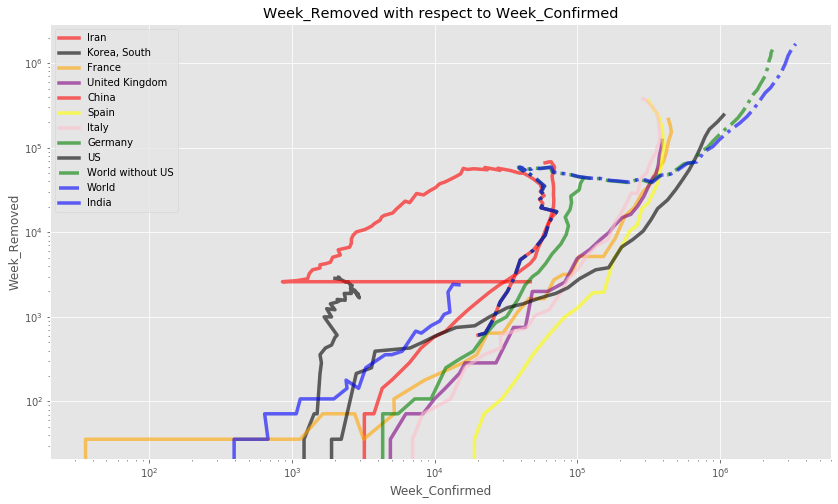

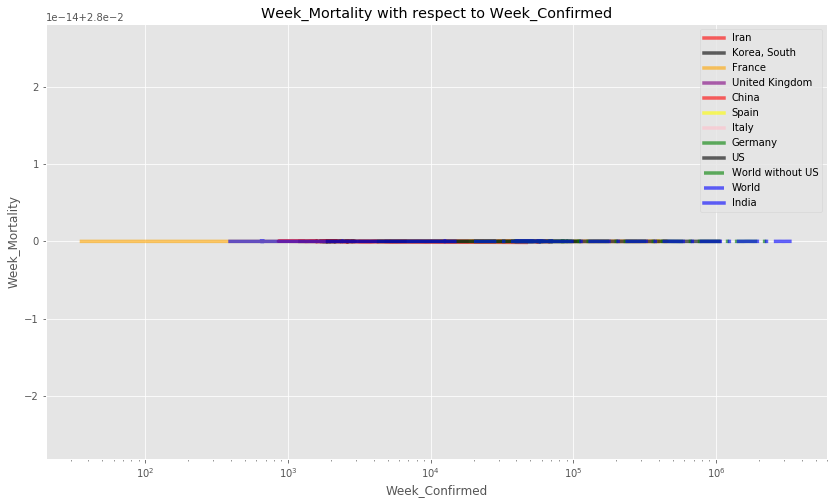

In [18]:
plotwithx('Week_Confirmed', ['Week_Removed', 'Week_Mortality'])

In [ ]:
plotwithx('Date', ['Confirmed', 'Week_Confirmed', 'Week_Mortality'])

In [ ]:
plotwithx('Date', ['Confirmed', 'Week_Confirmed', 'Active', 'Deaths'])